In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(305)

In [2]:
def get_score(_base_value, _coin_count, _coin_value, _front_probability = 0.5):
    base_value =_base_value
    coin_count = _coin_count
    coin_value = _coin_value
    front_probability = _front_probability

    result_score = base_value

    for i in range(coin_count):
        toss = float(np.random.uniform(0,1))
        if toss < front_probability:
            result_score += coin_value
            #앞면이 한 번 뜰 때마다 기본값에서 코인 가중치를 더해주는 방식
        else:
            pass

    return result_score

  #기본 합을 위해 필요한 코인토스 결과 리턴 함수

In [3]:
def Clash(skill_inform1, skill_inform2):
    base1, coin_quantity1, coin_score1, probability_1 = skill_inform1
    base2, coin_quantity2, coin_score2, probability_2 = skill_inform2

    coin_quantity_temp1 = coin_quantity1
    coin_quantity_temp2 = coin_quantity2

    while coin_quantity_temp1 > 0 and coin_quantity_temp2 > 0:
        result_score1 = get_score(base1, coin_quantity_temp1, coin_score1, probability_1)
        result_score2 = get_score(base2, coin_quantity_temp2, coin_score2, probability_2)

        if result_score1 > result_score2:
            coin_quantity_temp2 -= 1

        elif result_score2 > result_score1:
            coin_quantity_temp1 -= 1

    if coin_quantity_temp1 > 0:
        return "skill 1 win"

    elif coin_quantity_temp1 == 0 and coin_quantity_temp2 == 0:
        return "error : both side skill coins are not remain."

    else:
        return "skill 2 win"

In [4]:
"""
    get_mean_probability

    param = _skill1 : 1번 스킬의 정보
            _skill2 : 2번 스킬의 정보
              스킬의 양식은 [스킬 위력, 스킬 코인 갯수, 코인 위력, 정신력] 으로 통일.

            _clash_repeat : 합 진행 횟수

    결과 : _clash_repeat 번 만큼 합을 진행한 결과를 토대로 skill1이 이길 확률을 반환함.
    
"""

def get_mean_probability(_skill1, _skill2, _clash_repeat):
    skill1 = _skill1
    skill2 = _skill2
    clash_repeat = _clash_repeat
    won_cnt = 0
    
    for i in range(clash_repeat):
        result = Clash(skill1, skill2)
        if result == "skill 1 win":
            won_cnt += 1
    
    return won_cnt / clash_repeat

In [6]:
"""
  get_skill_prob_list
  param = _skill1 = 1번 스킬의 정보 
          _skill2 = 2번 스킬의 정보
          _clash_repeat = 합 진행 횟수
          _mentality_gap_rev = 1 / 정신력 값의 변화량 (정신력 값의 구간 수)

  결과 :
  'x': 1차원 배열, 0부터 1까지 _mentality_gap_rev 만큼의 구간 값을 가짐.
  'y': 1차원 배열, 0부터 1까지 _mentality_gap_rev 만큼의 구간 값을 가짐.
  'z': 2차원 배열, x[_x], y[_y]는 z[_x][_y]와 대응됨

  으로 구성된 dictionary를 반환.
"""


def get_skill_prob_list(_skill1, _skill2, _clash_repeat=100, _mentality_gap_rev = 1000):
    base_value1, coin_count1, coin_value1 = _skill1
    base_value2, coin_count2, coin_value2 = _skill2
    clash_repeat = _clash_repeat
    mentality_gap_rev = _mentality_gap_rev
    
    x = np.linspace(0, 1, mentality_gap_rev)
    y = np.linspace(0, 1, mentality_gap_rev)
    z = list()
    cnt = 0
    
    for i in range(mentality_gap_rev):
        z.append(list())
        for q in range(mentality_gap_rev):
            skill1 = [base_value1, coin_count1, coin_value1, x[i]]
            skill2 = [base_value2, coin_count2, coin_value2, y[q]]
            z[-1].append(get_mean_probability(skill1, skill2, clash_repeat))
            cnt+=1
            if cnt % ((mentality_gap_rev**2)/10) == 0:
                print(str(cnt/(((mentality_gap_rev**2)/10))) + " / 10 completed.")
    # x,y에 해당하는 확률을 z에 넣어줌. (clash_repeat만큼 반복했을때 얻어지는 확률)
    
    return_dict = dict()
    return_dict['x'] = x
    return_dict['y'] = y
    return_dict['z'] = z
    
    return return_dict
    

In [10]:
"""
prob_visualization

param : _result_dictionary : x, y, z값으로 구성됨.
        alpha : True일 경우 승률이 투명도로 반영됨, false일 경우 투명도가 반영되지 않음.

결과 : 해당 result의 result에서 1번스킬의 승률이 높은 구간은 빨간색, 2번 스킬의 승률이 높은 구간은 초록색으로 표기된다.
       투명도가 낮을수록 확률이 높다는 것을 의미한다.
"""

def prob_visualization(_result_dictionary, alpha = True):
    result = _result_dictionary
    x = result['x']
    y = result['y']
    z = result['z']
    cnt = 0
    for x_ in range(len(x)):
        for y_ in range(len(y)):
            value = z[x_][y_]
            if alpha == True:
                if value > 0.5:
                    plt.scatter(float(x[x_]),float(y[y_]), c='r', alpha = 1-value)
                else:
                    plt.scatter(float(x[x_]), float(y[y_]), c='g', alpha = value)
            else:
                if value > 0.5:
                    plt.scatter(float(x[x_]),float(y[y_]), c='r', alpha = 0.7)
                else:
                    plt.scatter(float(x[x_]), float(y[y_]), c='g', alpha = 0.7)
        
        cnt+=1
        print(str(cnt)+" ", end = "")
        if cnt%10 == 0:
            print("x_")
                
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    
    plt.plot()

#예제

이 아래부턴 일부 데이터에 대한 사용 예제이다.
<br>다코인 스킬중 하나인 난도질과 강력한 단코인 스킬인 난도질의 승률 비교 + 정신력에 따른 승률의 시각화를 제공하며  
<br>R사 순록팀 이스마엘의 정신채찍과 쥐는 자 파우스트의 쥐어짐의 승률비교 + 정신력에 따른 승률의 시각화를 제공한다.

In [7]:
난도질_temp = [5, 1, 25, 0.7]
신속한제압_temp =  [3, 5, 2, 0.5]

get_mean_probability(신속한제압_temp, 난도질_temp, 1000)


0.548

In [8]:
정신채찍 = [2, 4, 5]
과충전 = [6, 3, 2]
쥐어짐 = [4, 3, 4]

res = get_skill_prob_list(정신채찍, 쥐어짐, 10, 100)

#print(res)

1.0 / 10 completed.
2.0 / 10 completed.
3.0 / 10 completed.
4.0 / 10 completed.
5.0 / 10 completed.
6.0 / 10 completed.
7.0 / 10 completed.
8.0 / 10 completed.
9.0 / 10 completed.
10.0 / 10 completed.


1 2 3 4 5 6 7 8 9 10 x_
11 12 13 14 15 16 17 18 19 20 x_
21 22 23 24 25 26 27 28 29 30 x_
31 32 33 34 35 36 37 38 39 40 x_
41 42 43 44 45 46 47 48 49 50 x_
51 52 53 54 55 56 57 58 59 60 x_
61 62 63 64 65 66 67 68 69 70 x_
71 72 73 74 75 76 77 78 79 80 x_
81 82 83 84 85 86 87 88 89 90 x_
91 92 93 94 95 96 97 98 99 100 x_


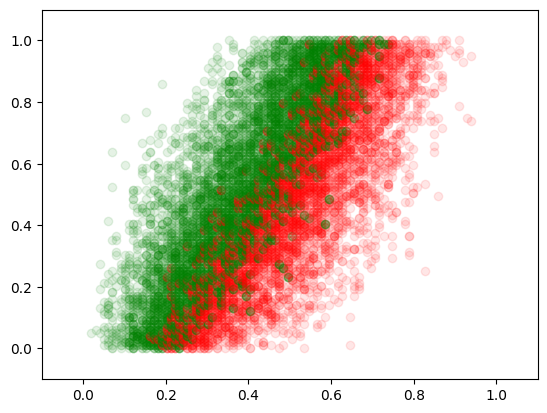

In [11]:
prob_visualization(res)



1 2 3 4 5 6 7 8 9 10 x_
11 12 13 14 15 16 17 18 19 20 x_
21 22 23 24 25 26 27 28 29 30 x_
31 32 33 34 35 36 37 38 39 40 x_
41 42 43 44 45 46 47 48 49 50 x_
51 52 53 54 55 56 57 58 59 60 x_
61 62 63 64 65 66 67 68 69 70 x_
71 72 73 74 75 76 77 78 79 80 x_
81 82 83 84 85 86 87 88 89 90 x_
91 92 93 94 95 96 97 98 99 100 x_


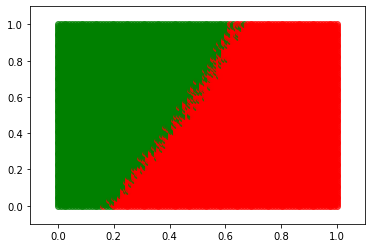

In [ ]:
prob_visualization(res, alpha=False)

In [ ]:
난도질 = [5, 1, 25]
신속한제압 = [3, 5, 2]

res2 = get_skill_prob_list(신속한제압, 난도질, 50, 100)

1.0 / 10 completed.
2.0 / 10 completed.
3.0 / 10 completed.
4.0 / 10 completed.
5.0 / 10 completed.
6.0 / 10 completed.
7.0 / 10 completed.
8.0 / 10 completed.
9.0 / 10 completed.
10.0 / 10 completed.


1 2 3 4 5 6 7 8 9 10 x_
11 12 13 14 15 16 17 18 19 20 x_
21 22 23 24 25 26 27 28 29 30 x_
31 32 33 34 35 36 37 38 39 40 x_
41 42 43 44 45 46 47 48 49 50 x_
51 52 53 54 55 56 57 58 59 60 x_
61 62 63 64 65 66 67 68 69 70 x_
71 72 73 74 75 76 77 78 79 80 x_
81 82 83 84 85 86 87 88 89 90 x_
91 92 93 94 95 96 97 98 99 100 x_


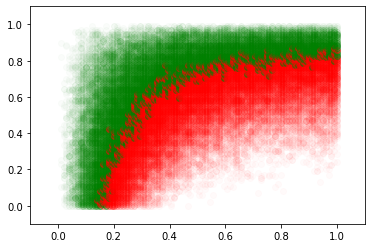

In [ ]:
prob_visualization(res2)

1 2 3 4 5 6 7 8 9 10 x_
11 12 13 14 15 16 17 18 19 20 x_
21 22 23 24 25 26 27 28 29 30 x_
31 32 33 34 35 36 37 38 39 40 x_
41 42 43 44 45 46 47 48 49 50 x_
51 52 53 54 55 56 57 58 59 60 x_
61 62 63 64 65 66 67 68 69 70 x_
71 72 73 74 75 76 77 78 79 80 x_
81 82 83 84 85 86 87 88 89 90 x_
91 92 93 94 95 96 97 98 99 100 x_


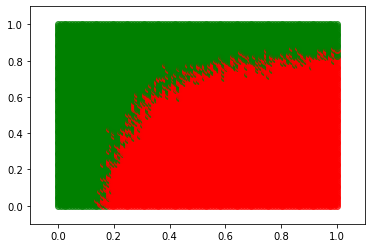

In [ ]:
prob_visualization(res2, alpha=False)


그래프에 시각화된 정보 중 일부만 추출해 사용한다. (한 스킬당 10000개의 정보는 과적합문제가 발생하기에 딱 맞다고 판단함)

<br> 아래의 코드는 이 중 n개의 데이터를 뽑았을 때, 데이터의 분포를 확인하기 위해 작성한 코드이다.

<br> 이를 통해 n=300으로 결정하였다.

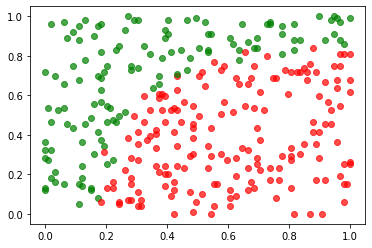

In [ ]:


dots = []
x_ = res2['x']
y_ = res2['y']
result = res2['z']

for i in range(300):
    
    while True:
        x = int (np.random.uniform(0, 100))
        y = int (np.random.uniform(0, 100))
        if [x_[x], y_[y], result[x][y]] not in dots:
            dots.append([x_[x], y_[y], result[x][y]])
            break

        else:
            continue

for dot in dots:
  _x = dot[0]
  _y = dot[1]
  value = dot[2]

  if value > 0.5:
      plt.scatter(_x, _y, c='r', alpha = 0.7)
  else:
      plt.scatter(_x, _y, c='g', alpha = 0.7)


